# Flood Prediction - Neuronales Netz 

It is very difficult to find the "optimal" model in neural networks, as many parameters can be adjusted. We have created a total of 576 models with all combinations of the following parameters: 
- dropout_rates = [0.0, 0.1, 0.2, 0.3]
- hidden_layers = [2, 3, 4]
- neurons_per_layer = [64, 128]
- activation_functions = ['relu', 'tanh', 'elu']
- learning_rates = [0.001, 0.01]
- batch_sizes = [2048]
- regularizers = [L2(l2=0.01), L1L2(l1=0.01, l2=0.01)]
- optimizers = ['Adam', 'SGD']

The actual code for this is located in the file "train_models.py". 
Here we summarize our findings:

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn as sl
%matplotlib inline
import scipy as sc
import math as ma
from math import exp, pow, sqrt, log

In [3]:
Results_NN = pd.read_csv("./model_results.csv")

Results_NN.head()

,Model,Dropout,Hidden Layers,Neurons per Layer,Activation,Learning Rate,Batch Size,Regularizer,Optimizer,Loss Function,R2,RMSE,Train Loss,Val Loss,RMSE Step 1,RMSE Step 2,RMSE Step 3,RMSE Step 4,RMSE Step 5,RMSE Step 6
0,1,0.0,2,64,relu,0.001,2048,<keras.src.regularizers.L2 object at 0x742f8f4...,Adam,mean_squared_error,0.963908,0.191590,0.038287,0.051067,0.106150,0.140273,0.179806,0.201913,0.225720,0.255445
1,2,0.0,2,64,relu,0.001,2048,<keras.src.regularizers.L2 object at 0x742f8f4...,SGD,mean_squared_error,0.967350,0.182226,0.033642,0.041646,0.095243,0.132446,0.163126,0.193801,0.219764,0.245287
2,3,0.0,2,64,relu,0.001,2048,<keras.src.regularizers.L1L2 object at 0x742f8...,Adam,mean_squared_error,0.962256,0.195925,0.047466,0.057039,0.106949,0.155054,0.180884,0.205075,0.232596,0.256843
3,4,0.0,2,64,relu,0.001,2048,<keras.src.regularizers.L1L2 object at 0x742f8...,SGD,mean_squared_error,0.963678,0.192199,0.048801,0.054930,0.102071,0.139598,0.174051,0.204371,0.232050,0.256588
4,5,0.0,2,64,relu,0.010,2048,<keras.src.regularizers.L2 object at 0x742f8f4...,Adam,mean_squared_error,0.935253,0.256611,0.043810,0.192171,0.303161,0.171598,0.222422,0.250128,0.258266,0.308239


A plot of the RMSE values for each hour can be helpful in gaining a general overview of the results

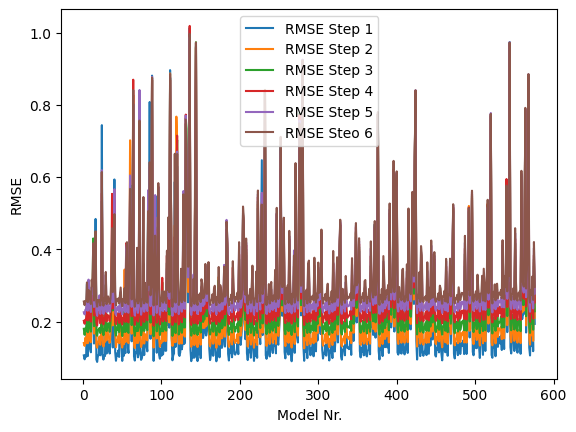

In [4]:
plt.plot(Results_NN["Model"], Results_NN["RMSE Step 1"], label="RMSE Step 1")
plt.plot(Results_NN["Model"], Results_NN["RMSE Step 2"], label="RMSE Step 2")
plt.plot(Results_NN["Model"], Results_NN["RMSE Step 3"], label="RMSE Step 3")
plt.plot(Results_NN["Model"], Results_NN["RMSE Step 4"], label="RMSE Step 4")
plt.plot(Results_NN["Model"], Results_NN["RMSE Step 5"], label="RMSE Step 5")
plt.plot(Results_NN["Model"], Results_NN["RMSE Step 6"], label="RMSE Step 6")

plt.xlabel("Model Nr.")
plt.ylabel("RMSE")
plt.legend()
plt.show()

The individual RMSE values for each hour are as expected, with the RMSE for the 1st predicted hour being the smallest and the one for the 6th predicted hour being the largest. 
When using only the "general" RMSE for the plot, the following diagram is obtained: 

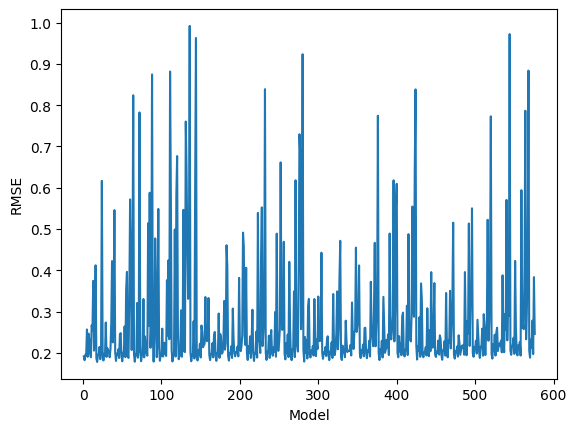

In [5]:
plt.plot(Results_NN["Model"], Results_NN["RMSE"])
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.show()

Now we need to find the model with the smallest RMSE: 

In [9]:
RMSE_min_index = Results_NN['RMSE'].idxmin()  
min_rmse = Results_NN['RMSE'].min()

print("min_index:", RMSE_min_index)
print("min_RMSE:", min_rmse)

min_index: 17
min_RMSE: 0.1780952416207078


Model with the largest R^2: 

In [12]:
R2_max_index = Results_NN['R2'].idxmax() 
max_r2 = Results_NN['R2'].max()

print("max_index:", R2_max_index)
print("max_R2:", max_r2)

max_index: 17
max_R2: 0.9688131213188172


Model 18 was the best one:

In [10]:
Best_Model = Results_NN.iloc[RMSE_min_index]
Best_Model

Model                                                               18
Dropout                                                            0.0
Hidden Layers                                                        2
Neurons per Layer                                                   64
Activation                                                         elu
Learning Rate                                                    0.001
Batch Size                                                        2048
Regularizer          <keras.src.regularizers.L2 object at 0x742f8f4...
Optimizer                                                          SGD
Loss Function                                       mean_squared_error
R2                                                            0.968813
RMSE                                                          0.178095
Train Loss                                                    0.028781
Val Loss                                                      0.036875
RMSE S

It would be interesting to compare the best and worst model. 

In [14]:
def find_best_and_worst_models(data):
    best_model = data.loc[data['R2'].idxmax()]
    worst_model = data.loc[data['R2'].idxmin()]
    
    best_rmse = data.loc[data['RMSE'].idxmin()]
    worst_rmse = data.loc[data['RMSE'].idxmax()]
    
    return best_model, worst_model, best_rmse, worst_rmse

best_model, worst_model, best_rmse, worst_rmse = find_best_and_worst_models(Results_NN)

print("Best Model based on R²:\n", best_model)
print("\nWorst Model based on R²:\n", worst_model)
print("\nBest Model based on RMSE:\n", best_rmse)
print("\nWorst Model based on RMSE:\n", worst_rmse)

Best Model based on R²:
 Model                                                               18
Dropout                                                            0.0
Hidden Layers                                                        2
Neurons per Layer                                                   64
Activation                                                         elu
Learning Rate                                                    0.001
Batch Size                                                        2048
Regularizer          <keras.src.regularizers.L2 object at 0x742f8f4...
Optimizer                                                          SGD
Loss Function                                       mean_squared_error
R2                                                            0.968813
RMSE                                                          0.178095
Train Loss                                                    0.028781
Val Loss                                            

Model 18 is the best model, Model 136 the worst. 
 
In comparison, the whole thing looks like this: 

In [17]:
best_model = Results_NN.loc[Results_NN['R2'].idxmax()]
worst_model = Results_NN.loc[Results_NN['R2'].idxmin()]

pd.concat([ worst_model, best_model], axis=1, keys=['Worst Model', 'Best Model'])

,Worst Model,Best Model
Model,136,18
Dropout,0.0,0.0
Hidden Layers,4,2
Neurons per Layer,128,64
Activation,tanh,elu
Learning Rate,0.01,0.001
Batch Size,2048,2048
Regularizer,<keras.src.regularizers.L1L2 object at 0x742f8...,<keras.src.regularizers.L2 object at 0x742f8f4...
Optimizer,SGD,SGD
Loss Function,mean_squared_error,mean_squared_error


It becomes clear that almost all hyperparameters are different. 

Let's look at which parameters are really important for improvement in the next step. 

In [18]:
def analyze_metrics_influence(data):
    # Only select numerical columns
    numeric_data = data.select_dtypes(include=[np.number])
    
    # Calculate correllation
    correlations = numeric_data.corr()
    
    r2_correlation = correlations['R2'].sort_values(ascending=False)
    rmse_correlation = correlations['RMSE'].sort_values(ascending=False)
    
    return r2_correlation, rmse_correlation

r2_correlation, rmse_correlation = analyze_metrics_influence(Results_NN)

correlation_comparison = pd.concat([r2_correlation, rmse_correlation], axis=1, keys=['Correlation with R²', 'Correlation with RMSE'])
correlation_comparison.drop(["Model", "R2", "Val Loss","Train Loss", "RMSE Step 1", "RMSE Step 2", "RMSE Step 3", "RMSE Step 4", "RMSE Step 5", "RMSE Step 6", "RMSE"])

,Correlation with R²,Correlation with RMSE
Dropout,0.079567,-0.066680
Neurons per Layer,-0.076479,0.070992
Hidden Layers,-0.214865,0.225237
Learning Rate,-0.223474,0.278501
Batch Size,NaN,NaN


From this table, it is evident that the Dropout rate and the number of neurons per layer have little impact.
However, the number of hidden layers and the learning rate are much more important.

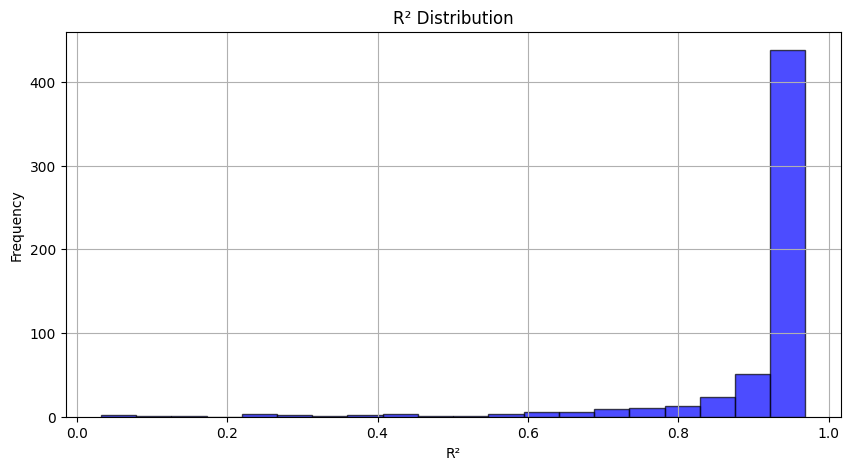

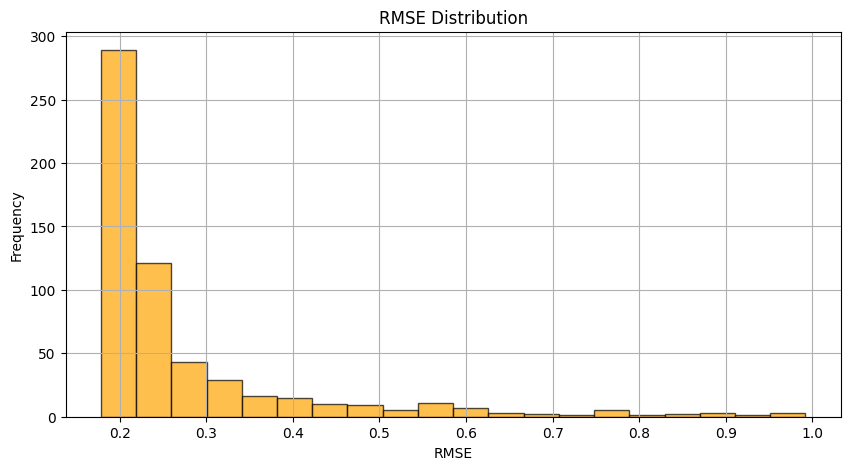

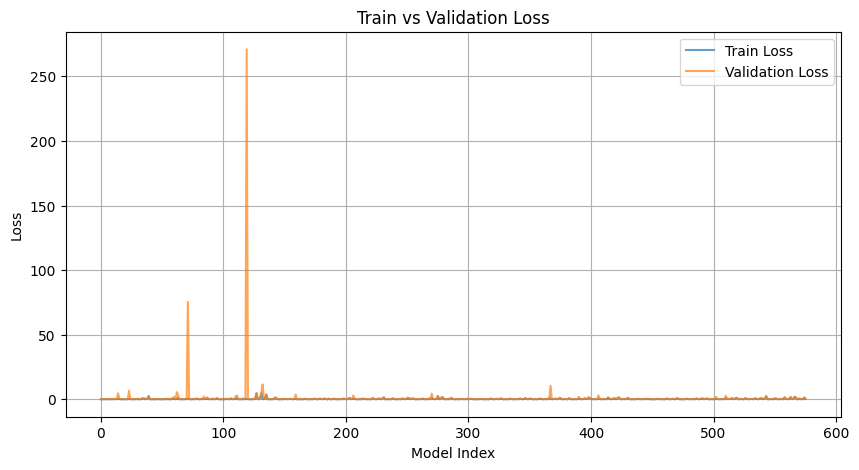

In [20]:
# Visualize important metrics

# R² Histogramm
plt.figure(figsize=(10, 5))
plt.hist(Results_NN['R2'], bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.title('R² Distribution')
plt.xlabel('R²')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# RMSE Histogramm
plt.figure(figsize=(10, 5))
plt.hist(Results_NN['RMSE'], bins=20, alpha=0.7, color='orange', edgecolor='black')
plt.title('RMSE Distribution')
plt.xlabel('RMSE')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Comparison between Train Loss and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(Results_NN['Train Loss'], label='Train Loss', alpha=0.7)
plt.plot(Results_NN['Val Loss'], label='Validation Loss', alpha=0.7)
plt.title('Train vs Validation Loss')
plt.xlabel('Model Index')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

This shows that there are definitely many paths to success. There are many models with good metrics, but also a few that perform very poorly.

Let's take a closer look at the best model. What is the input feature importance?

In [21]:
# Train model again

import os
os.environ['CUDA_VISIBLE_DEVICES'] = ''

from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau

import tensorflow as tf
import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam, RMSprop  # Optimizers
from tensorflow.keras.regularizers import L1, L2, L1L2
from tensorflow.keras.utils import to_categorical, plot_model

from sklearn.model_selection import train_test_split

In [22]:
Daten = pd.read_csv('./Flut-Daten.csv')

# Create targets
for i in range(1, 7):
    Daten[f"Q_target_{i}"] = Daten["Q"].shift(-i)

# Remove missing values 
Daten = Daten.dropna()

# here the data must still be split into train and test sets 
X = Daten.drop(columns=["Q"] + [f"Q_target_{i}" for i in range(1, 7)])
y = Daten[[f"Q_target_{i}" for i in range(1, 7)]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [23]:
from IPython.display import clear_output
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

### Best Model

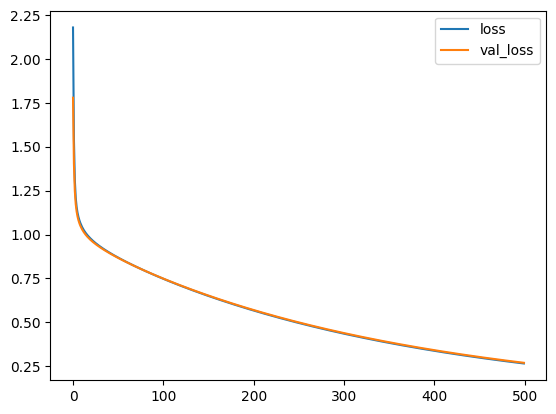

In [24]:
feature_count = X_train.shape[1]

EarlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# square weight decay auf die hiddenlayer anwenden (regularisierung)
l2 = tf.keras.regularizers.L2(l2=0.01)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Learning Rate Scheduler
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=20, min_lr=1e-5)

NNRegModel1=Sequential()

NNRegModel1.add(InputLayer(input_shape=(feature_count,)))
NNRegModel1.add(Dropout(0.0))


for _ in range(2): 
    NNRegModel1.add(Dense(64, activation='elu', kernel_regularizer=l2))
    NNRegModel1.add(Dropout(0.0))

NNRegModel1.add(Dense(6,use_bias=True))

sgd = SGD(learning_rate=0.001)
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

NNRegModel1.compile(loss='mean_squared_error', optimizer=sgd, metrics=['mean_absolute_error'])

NNRegMod1History=NNRegModel1.fit(X_train, y_train,
          shuffle=False,
          epochs=500,
          batch_size=2048,
          verbose=0,
          validation_data=(X_test, y_test),                  
          callbacks=[plot_losses, EarlyStopping, lr_schedule])

In the initial attempt, it became evident that the model continues to make progress even beyond 500 epochs. However, the improvements are marginal, making 500 epochs appropriate.

In [25]:
y_hat_tr_NN = NNRegModel1.predict(X_train)
y_hat_test_NN = NNRegModel1.predict(X_test)

4666/4666 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [26]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# the targets must be present as np-array
if isinstance(y_test, pd.DataFrame):
    y_test = y_test.to_numpy()

results = []
for i in range(6):  
    rmse = sqrt(mean_squared_error(y_test[:, i], y_hat_test_NN[:, i]))
    r2 = r2_score(y_test[:, i], y_hat_test_NN[:, i])
    results.append((rmse, r2))

for i, (rmse, r2) in enumerate(results, start=1):
    print(f"Stunde {i}: RMSE = {rmse:.4f}, R^2 = {r2:.4f}")

Stunde 1: RMSE = 0.1307, R^2 = 0.9832
Stunde 2: RMSE = 0.1586, R^2 = 0.9753
Stunde 3: RMSE = 0.1886, R^2 = 0.9650
Stunde 4: RMSE = 0.2174, R^2 = 0.9535
Stunde 5: RMSE = 0.2421, R^2 = 0.9424
Stunde 6: RMSE = 0.2645, R^2 = 0.9312


In [27]:
NNRegModel1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 19)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,832 (22.79 KB)

 Trainable params: 5,830 (22.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

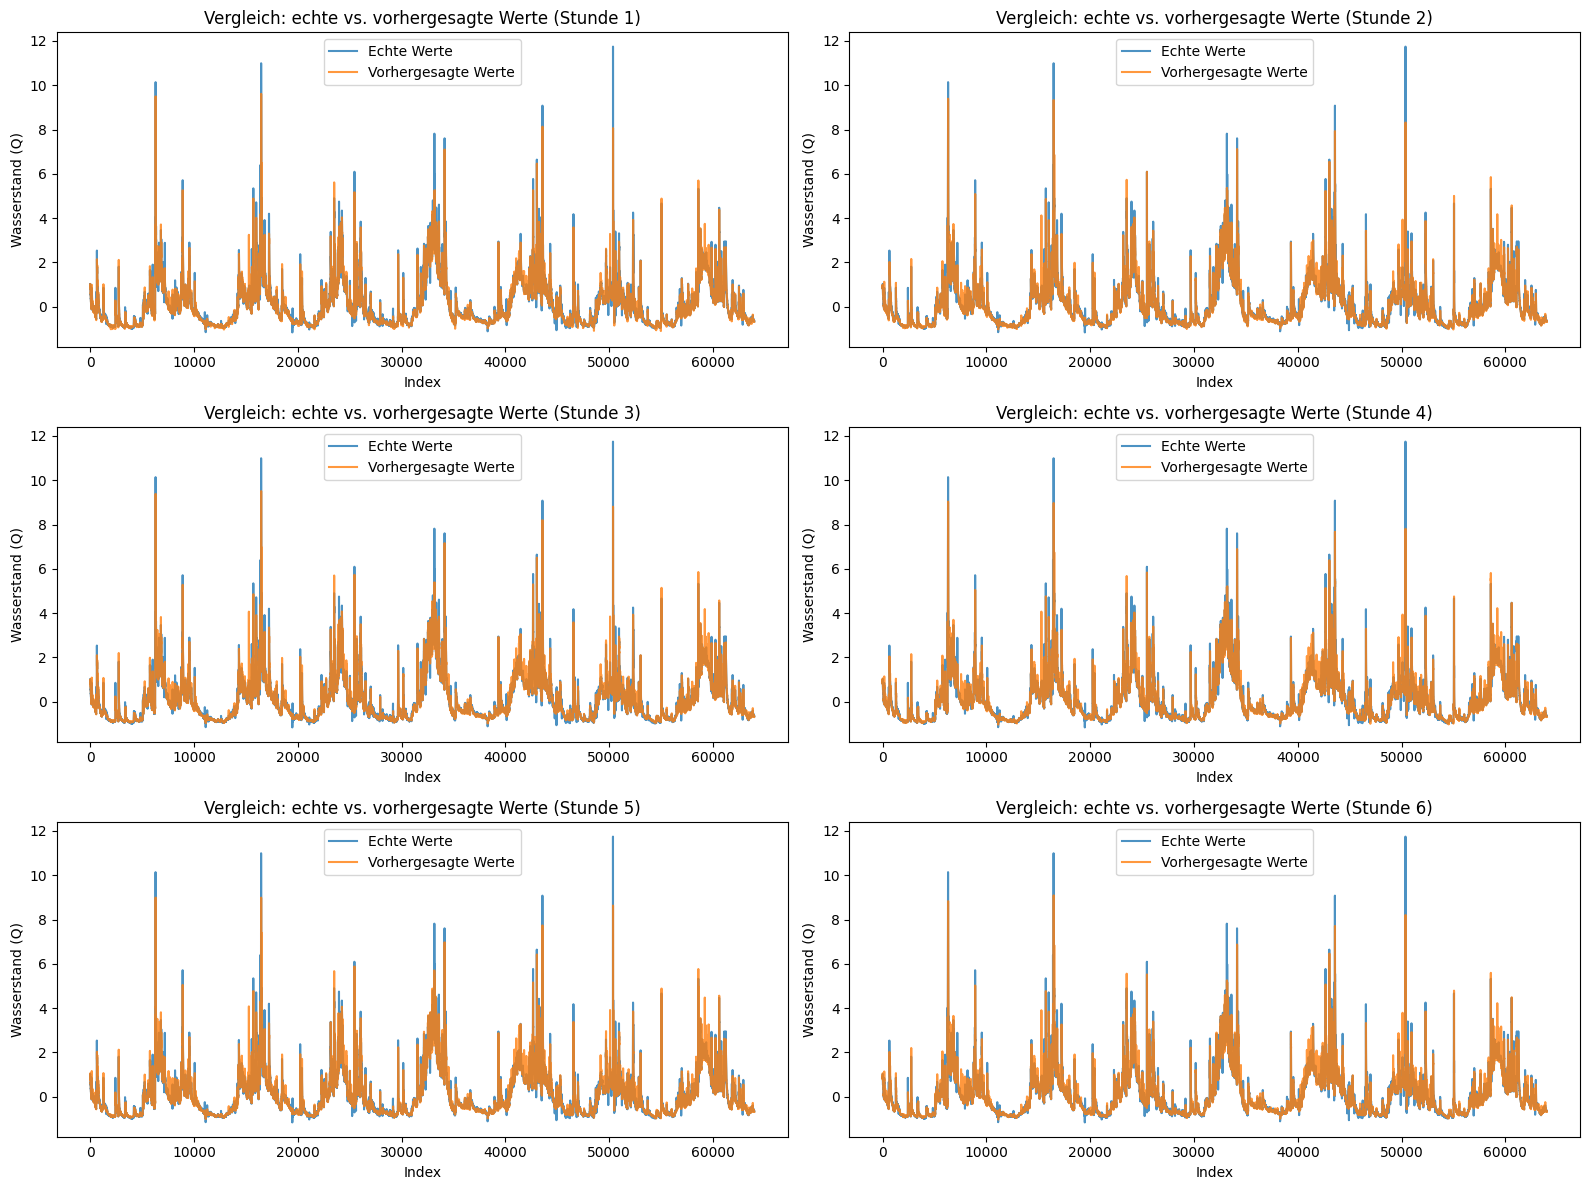

In [28]:
plt.figure(figsize=(16, 12))
    
for i in range(1, 7):
    plt.subplot(3, 2, i)
    
    # True values and predictions for the i-th hour
    y_test_hour = y_test[:, i - 1]  
    pred_hour = y_hat_test_NN[:, i - 1]  

    plt.plot(y_test_hour, label="True values", alpha=0.8)
    plt.plot(pred_hour, label="Predicted values", alpha=0.8)
    plt.title(f"Comparison: true vs. predicted values (Hour {i})")
    plt.xlabel("Index")
    plt.ylabel("Water Level (Q)")
    plt.legend()

plt.tight_layout()
plt.show()

Now we are looking for the best RELU and the best Tanh model among our models:

In [29]:
# Filter models with "tanh" and "relu" as activation functions
best_tanh_model = Results_NN[Results_NN['Activation'] == 'tanh'].sort_values(by='R2', ascending=False).iloc[0]
best_relu_model = Results_NN[Results_NN['Activation'] == 'relu'].sort_values(by='R2', ascending=False).iloc[0]

# Display both models side by side in a DataFrame
comparison_df = pd.DataFrame({
    "Bestes Modell - ReLU": best_relu_model,
    "Bestes Modell - Tanh": best_tanh_model
})

comparison_df

,Bestes Modell - ReLU,Bestes Modell - Tanh
Model,50,58
Dropout,0.0,0.0
Hidden Layers,3,3
Neurons per Layer,64,64
Activation,relu,tanh
Learning Rate,0.001,0.001
Batch Size,2048,2048
Regularizer,<keras.src.regularizers.L2 object at 0x742f8f4...,<keras.src.regularizers.L2 object at 0x742f8f4...
Optimizer,SGD,SGD
Loss Function,mean_squared_error,mean_squared_error


### Here is the neural network for the best RELU model:

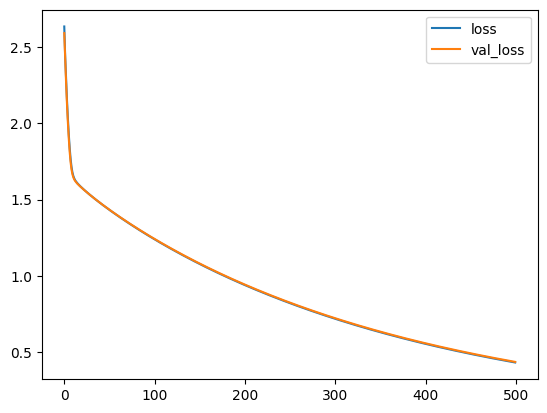

In [30]:
feature_count = X_train.shape[1]

EarlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# apply square weight decay to the hidden layers (regularization)
l2 = tf.keras.regularizers.L2(l2=0.01)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Learning Rate Scheduler
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=20, min_lr=1e-5)

NNRegModel1=Sequential()

NNRegModel1.add(InputLayer(input_shape=(feature_count,)))
NNRegModel1.add(Dropout(0.0))

for _ in range(3): 
    NNRegModel1.add(Dense(64, activation='relu', kernel_regularizer=l2))
    NNRegModel1.add(Dropout(0.0))

NNRegModel1.add(Dense(6,use_bias=True))

sgd = SGD(learning_rate=0.001)
adam = tf.keras.optimizers.Adam(learning_rate=0.01)

NNRegModel1.compile(loss='mean_squared_error', optimizer=sgd, metrics=['mean_absolute_error'])

NNRegMod1History=NNRegModel1.fit(X_train, y_train,
          shuffle=False,
          epochs=500,
          batch_size=2048,
          verbose=0,
          validation_data=(X_test, y_test),                  
          callbacks=[plot_losses, EarlyStopping, lr_schedule])

4666/4666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


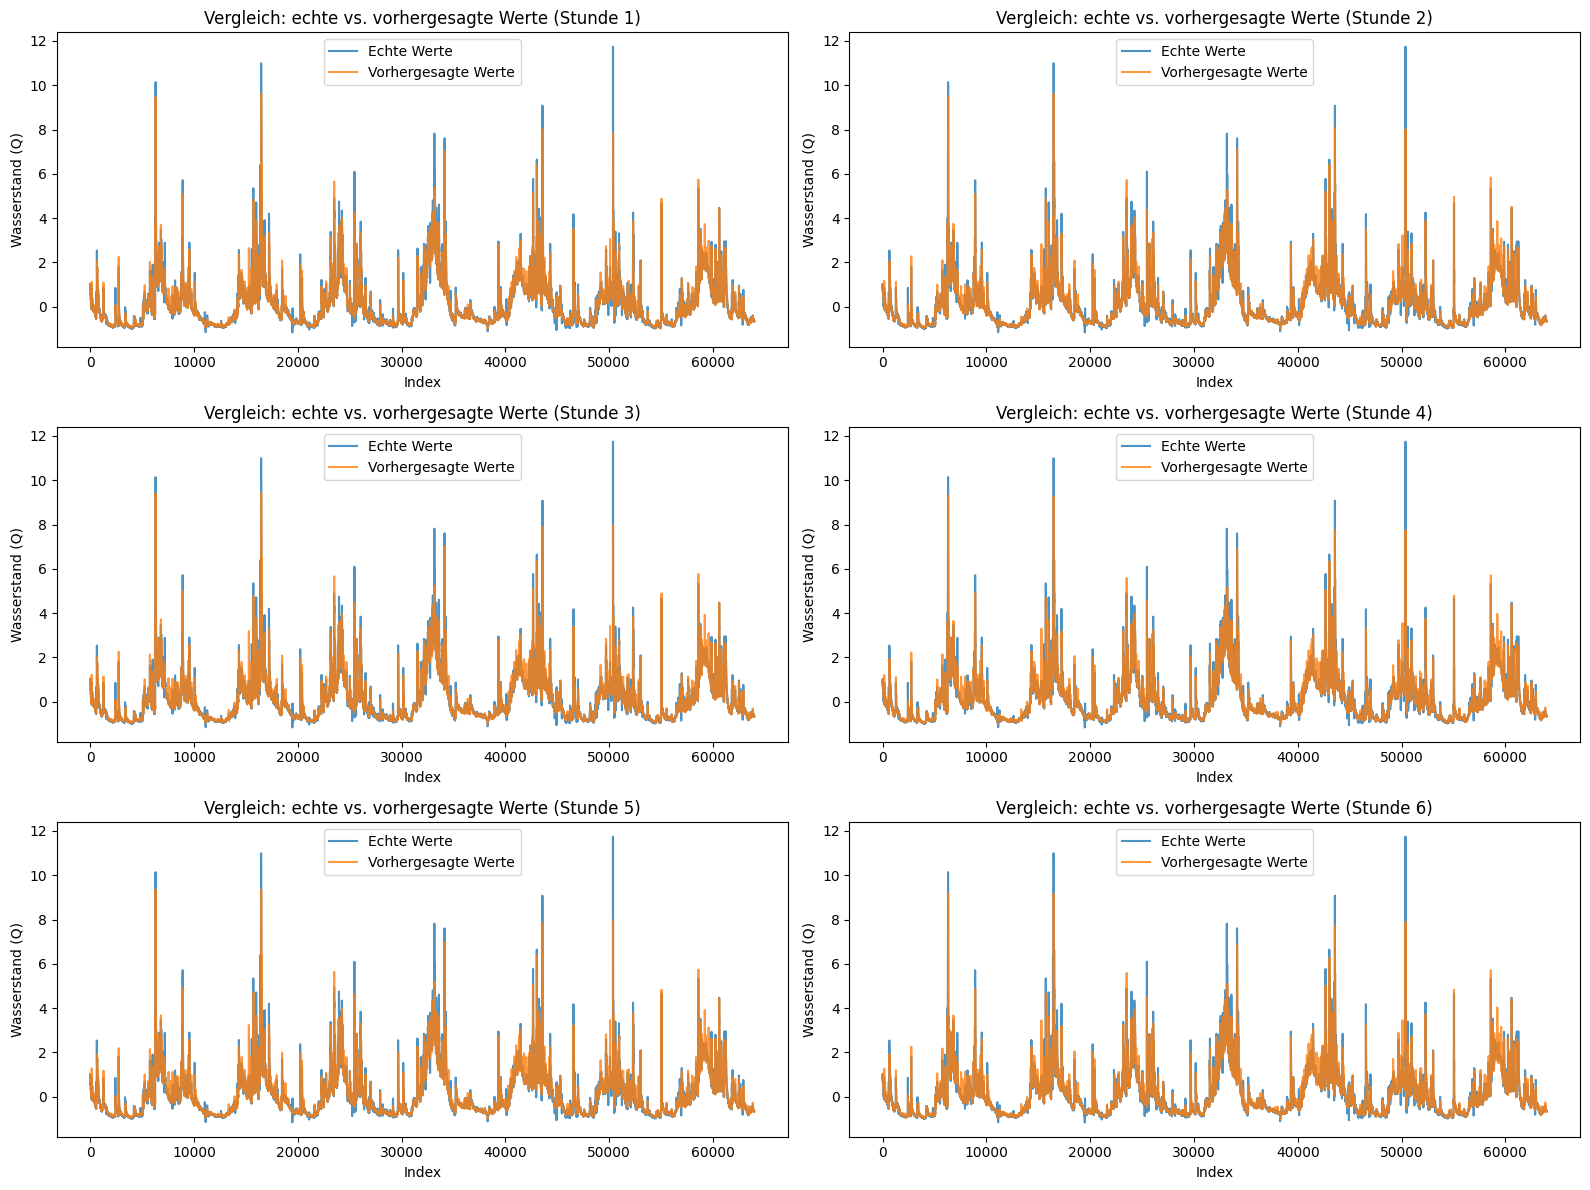

In [31]:
y_hat_tr_NN = NNRegModel1.predict(X_train)
y_hat_test_NN = NNRegModel1.predict(X_test)

plt.figure(figsize=(16, 12))
    
for i in range(1, 7):
    plt.subplot(3, 2, i)
    
    # True values and predictions for the i-th hour
    y_test_hour = y_test[:, i - 1]  
    pred_hour = y_hat_test_NN[:, i - 1]  

    plt.plot(y_test_hour, label="True values", alpha=0.8)
    plt.plot(pred_hour, label="Predicted values", alpha=0.8)
    plt.title(f"Comparison: true vs. predicted values (Hour {i})")
    plt.xlabel("Index")
    plt.ylabel("Water Level (Q)")
    plt.legend()

plt.tight_layout()
plt.show()

In [32]:
if isinstance(y_test, pd.DataFrame):
    y_test = y_test.to_numpy()

# Calculation of RMSE and R^2 for each column
results = []
for i in range(6): 
    rmse = sqrt(mean_squared_error(y_test[:, i], y_hat_test_NN[:, i]))
    r2 = r2_score(y_test[:, i], y_hat_test_NN[:, i])
    results.append((rmse, r2))

for i, (rmse, r2) in enumerate(results, start=1):
    print(f"Stunde {i}: RMSE = {rmse:.4f}, R^2 = {r2:.4f}")

Stunde 1: RMSE = 0.1314, R^2 = 0.9830
Stunde 2: RMSE = 0.1578, R^2 = 0.9755
Stunde 3: RMSE = 0.1886, R^2 = 0.9650
Stunde 4: RMSE = 0.2156, R^2 = 0.9543
Stunde 5: RMSE = 0.2412, R^2 = 0.9428
Stunde 6: RMSE = 0.2631, R^2 = 0.9319


In [33]:
NNRegModel1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_3 (Dropout)             │ (None, 19)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,992 (39.04 KB)

 Trainable params: 9,990 (39.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

And finally, the best tanh model.

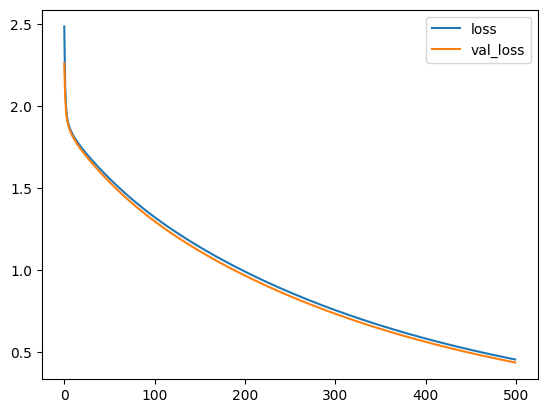

In [34]:
feature_count = X_train.shape[1]

EarlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

l2 = tf.keras.regularizers.L2(l2=0.01)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Learning Rate Scheduler
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=20, min_lr=1e-5)

NNRegModel1=Sequential()

NNRegModel1.add(InputLayer(input_shape=(feature_count,)))
NNRegModel1.add(Dropout(0.0))

for _ in range(3): 
    NNRegModel1.add(Dense(64, activation='tanh', kernel_regularizer=l2))
    NNRegModel1.add(Dropout(0.0))

NNRegModel1.add(Dense(6,use_bias=True))

sgd = SGD(learning_rate=0.001)
adam = tf.keras.optimizers.Adam(learning_rate=0.01)

NNRegModel1.compile(loss='mean_squared_error', optimizer=sgd, metrics=['mean_absolute_error'])

NNRegMod1History=NNRegModel1.fit(X_train, y_train,
          shuffle=False,
          epochs=500,
          batch_size=2048,
          verbose=0,
          validation_data=(X_test, y_test),                  
          callbacks=[plot_losses, EarlyStopping, lr_schedule])

4666/4666 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


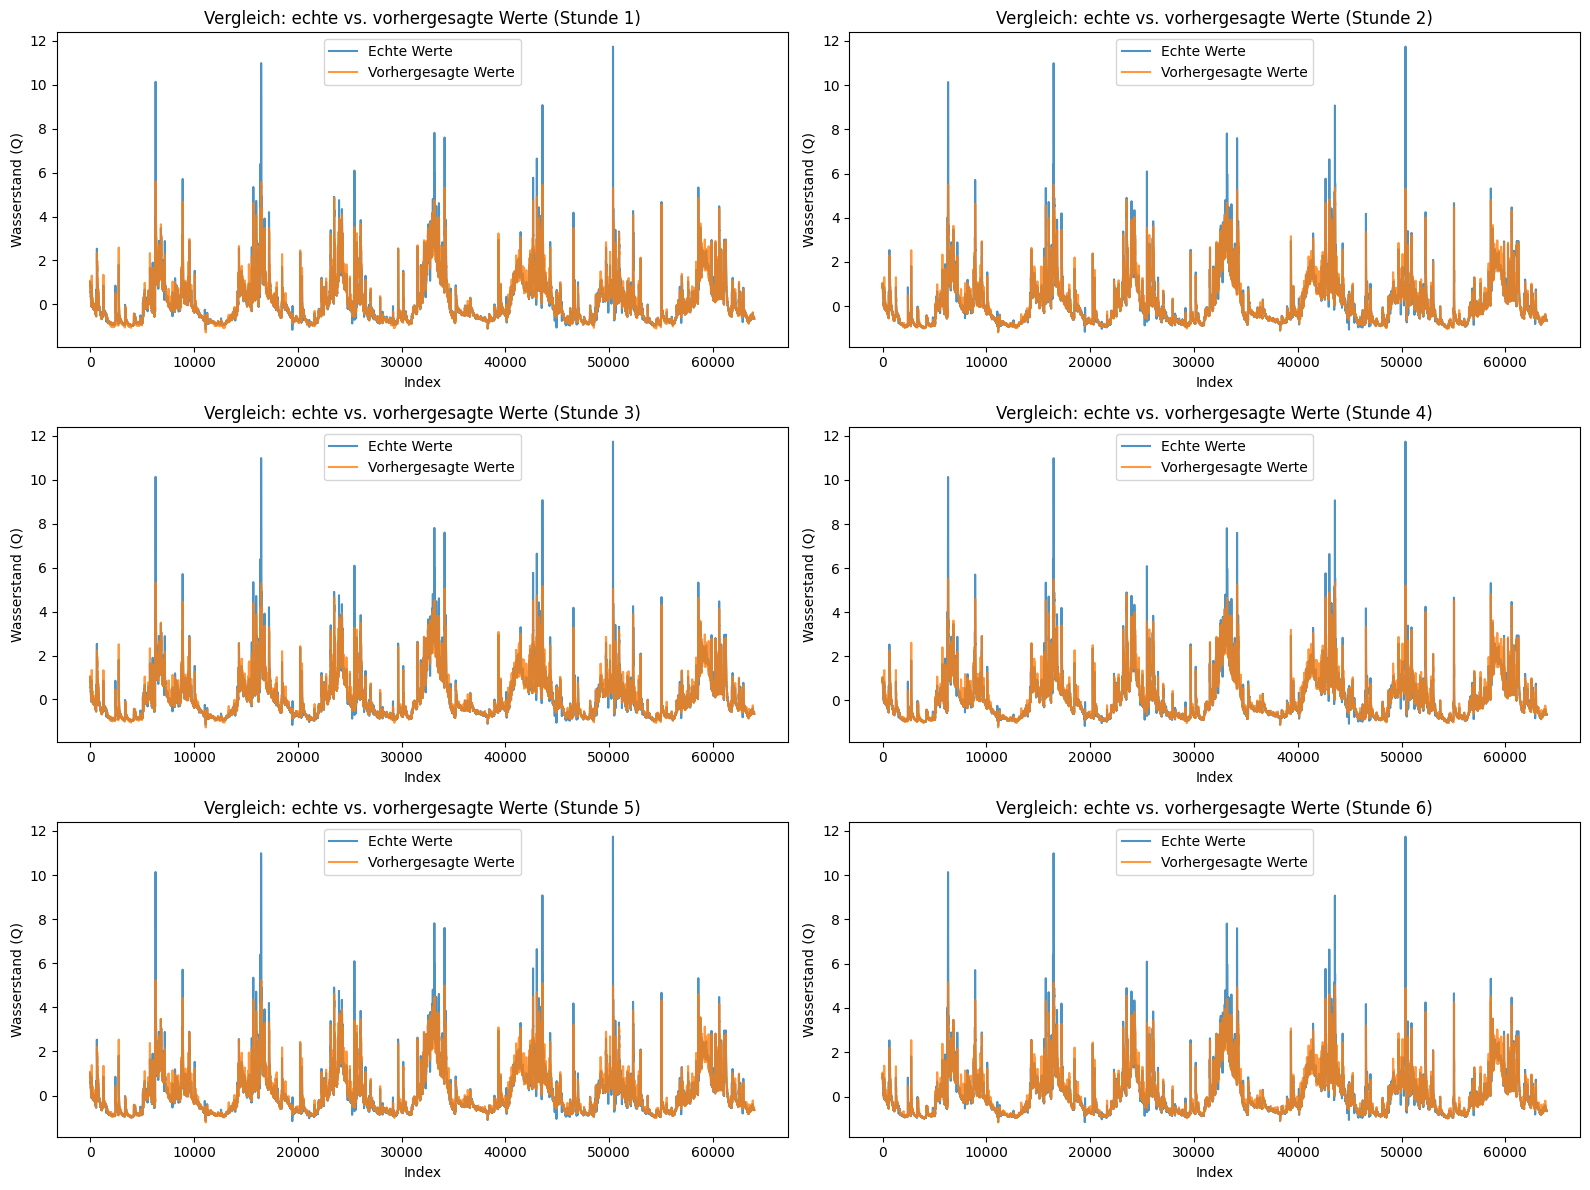

In [35]:
y_hat_tr_NN = NNRegModel1.predict(X_train)
y_hat_test_NN = NNRegModel1.predict(X_test)

plt.figure(figsize=(16, 12))
    
for i in range(1, 7):
    plt.subplot(3, 2, i)
    
    # Echte Werte und Vorhersagen für die i-te Stunde
    y_test_hour = y_test[:, i - 1]  
    pred_hour = y_hat_test_NN[:, i - 1]  

    plt.plot(y_test_hour, label="True Values", alpha=0.8)
    plt.plot(pred_hour, label="Predicted Values", alpha=0.8)
    plt.title(f"Comparison: true vs. predicted values (Hour {i})")
    plt.xlabel("Index")
    plt.ylabel("Water Level (Q)")
    plt.legend()

plt.tight_layout()
plt.show()

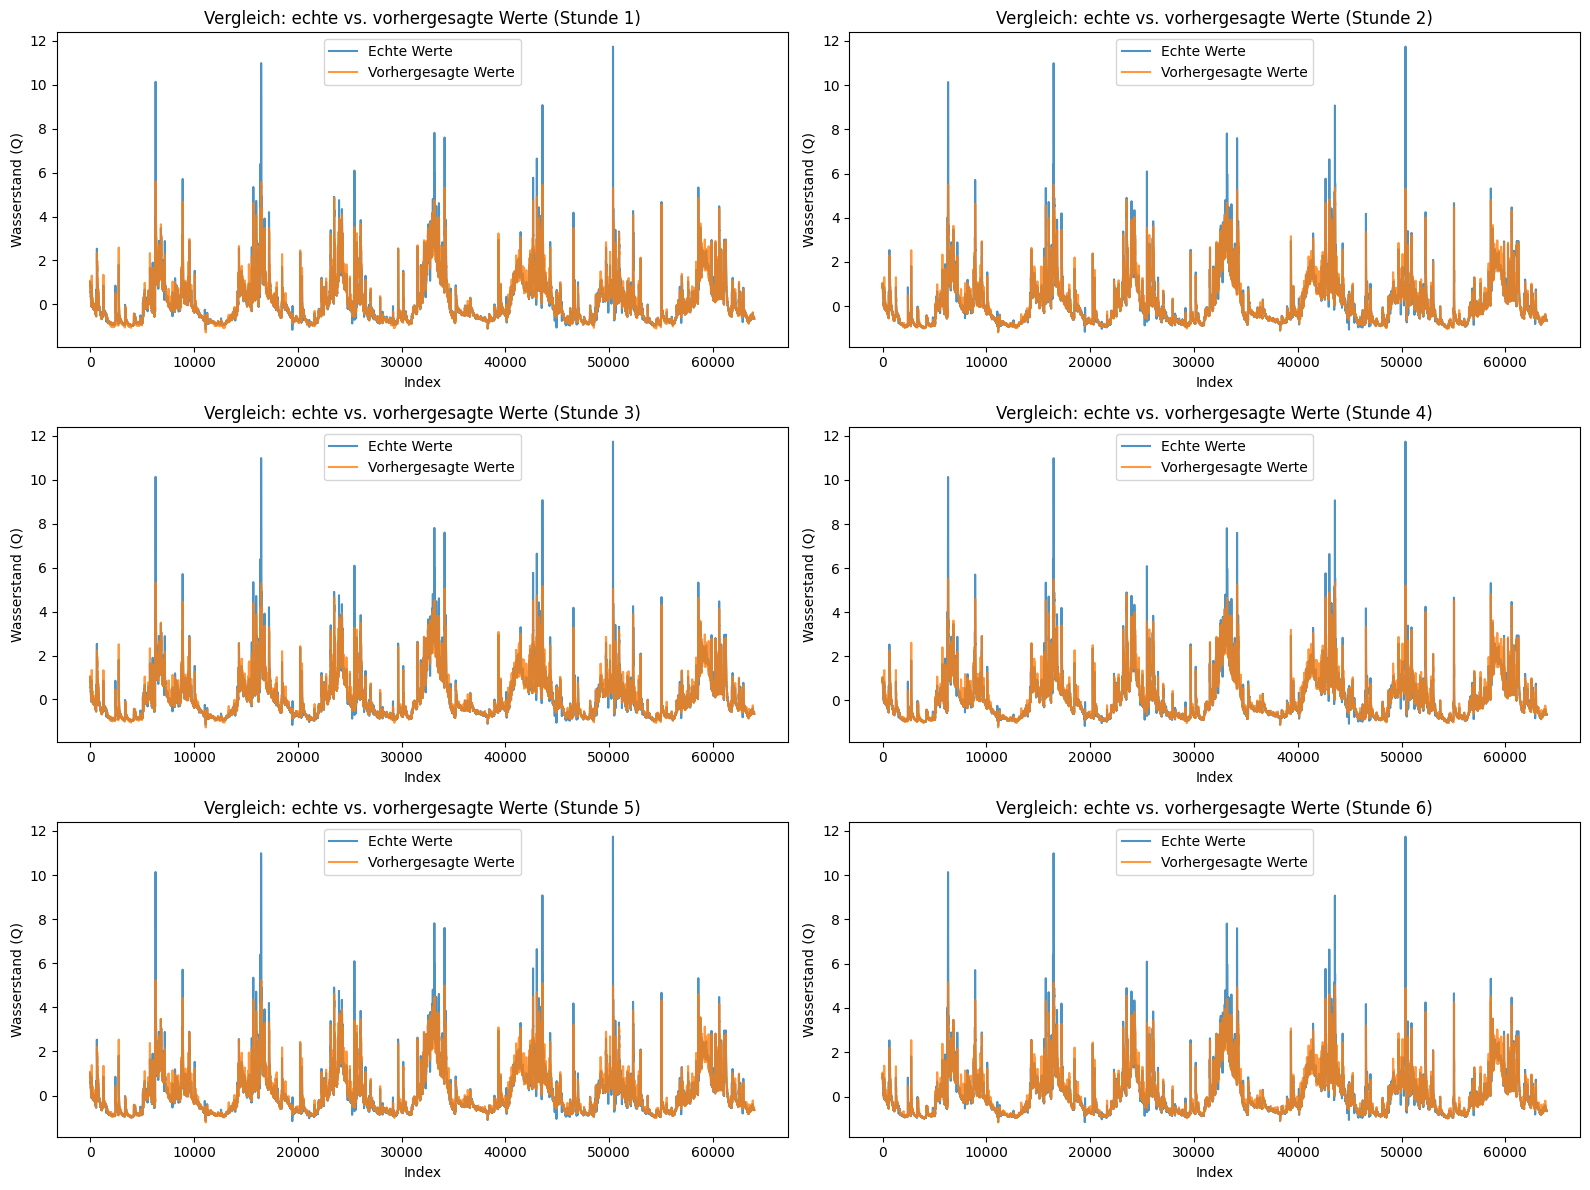

In [36]:
plt.figure(figsize=(16, 12))
    
for i in range(1, 7):
    plt.subplot(3, 2, i)
    
    # True values and predictions for the i-th hour
    y_test_hour = y_test[:, i - 1]  
    pred_hour = y_hat_test_NN[:, i - 1]  

    plt.plot(y_test_hour, label="True Values", alpha=0.8)
    plt.plot(pred_hour, label="Predicted Values", alpha=0.8)
    plt.title(f"Comparison: true vs. predicted values (Hour {i})")
    plt.xlabel("Index")
    plt.ylabel("Water Level (Q)")
    plt.legend()

plt.tight_layout()
plt.show()

In [37]:
NNRegModel1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_7 (Dropout)             │ (None, 19)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,992 (39.04 KB)

 Trainable params: 9,990 (39.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

These are our results for the neural network. Overall, it can be said that the effort we put into all the models was not really effective, as the linear model was still better. Nevertheless, it was interesting to try out the different activation functions, number of neurons, etc.